![img](https://i.imgur.com/twvZap3.png)

# Introduction

## What's Gravitational Wave?

> Gravitational waves are ripples in space-time (the fabled “fabric” of the Universe) caused by massive objects moving with extreme accelerations. In outer space that means objects like neutron stars or black holes orbiting around each other at ever increasing rates, or stars that blow themselves up. ([Source](https://www.ligo.caltech.edu/page/gravitational-waves)) 

The presence of GW was first proposed by Einstein in his paper General Theory of Relativity paper in 1916. The first proof indicating the presence of GW however, came in 1974 and further works confirmed the presence of GW. Note that all these were indirect proofs indicating the presence of GW. The first time the GW was actually (physically) measured was in September 14, 2015 by LIGO inferometer caused by gravitational waves generated by two colliding black holes 1.3 billion light-years away.

Note that events creating such GWs are violent and catastrophic, however, by the time these waves reach us they are thousands of billions of times smaller in magnitude. The amount of space-time wobbling that was detected as GW was a 1000 times smaller than the nucleus of an atom! Indeed LIGO is an engineering feet and the science is, well I can't even put words to the thrill I feel thinking about it. Learn more about GWs [here](https://www.ligo.caltech.edu/page/what-are-gw).

## Why bother detecting such miniscule signals?

I wanted to write something original after reading it [here](https://www.ligo.caltech.edu/page/why-detect-gw). I will just quote a paragraph as it is,

> Imagine humans were a species that only had eyes and no ears. You can learn a lot about the world around you simply by studying the light from objects. Then one day, someone invents something they call an ear. This device senses vibrations in air or water that you could not have known existed before. This ear opens up an entirely new realm of observation that you didn't have access to simply by studying electromagnetic radiation (ight)! As an antenna able to detect vibrations in the 'medium' of space-time, LIGO is akin to a human ear able to detect vibrations in a medium like air or water. ([Source](https://www.ligo.caltech.edu/page/why-detect-gw))

GWs are generated by violent cosmic activities - blackhole colliding,supernovae explosion, or maybe *birth of a new universe*! GWs don't interact with matter like electromagnetic radiations (reflect, refract, distortion, etc) and thus carries undistorted information about the origin of the wave. 

## Sources and Types of Gravitational Waves

There are four types of gravitational waves depending on the source of the waves ([Source](https://www.ligo.caltech.edu/page/gw-sources)):

- Continuous Gravitational Waves: Continuous gravitational waves are thought to be produced by a single spinning massive object like a neutron star. Any bumps on or imperfections in the spherical shape of this star will generate gravitational waves as it spins. [This is how a Continus GW will sound like to LIGO](http://www.black-holes.org/sound/Periodic.wav). 

- Compact Binary Inspiral Gravitational Waves: Compact binary inspiral gravitational waves are produced by orbiting pairs of massive and dense ("compact") objects like white dwarf stars, black holes, and neutron stars. All the GWs detected so far by LIGO falls under this category. 

    A spinning pair of compact objects orbit each other and in the process release some of the orbital energy as gravitational waves. Due to this release of orbital energy, they move closer and closer, orbiting faster thus releasing more energy as gravitational waves and this goes on till the objects merge together. You may note that this process takes millions and billions of years and the strongest gravitational wave generated is at the "final" moment of before two objects collide. This mechanism of wave generation is called "inspiral". The inspiral for two black holes is shorter than that of two neutron stars. 
    
    > The first pair of merging black holes that LIGO detected produced a signal just two-tenths of a second long. In contrast, the first neutron star merger LIGO detected in August 2017 generated a signal over 100 seconds long in our instruments.
    
    The competition data is simulating gravitational waves generated by merging of two black holes. This is evident by this paragraph in the Data section:
    
    > The parameters that determine the exact form of a binary black hole waveform are the masses, sky location, distance, black hole spins, binary orientation angle, gravitational wave polarisation, time of arrival, and phase at coalescence (merger). These parameters (15 in total) have been randomised according to astrophysically motivated prior distributions and used to generate the simulated signals present in the data, but are not provided as part of the competition data. 
    
    I will highly encourage to watch this YouTube video [Journey of a Gravitational Wave](https://www.youtube.com/watch?v=FlDtXIBrAYE). Listen to these two detected sounds:
    
    - [The Sound of Two Black Holes Colliding](https://www.youtube.com/watch?v=QyDcTbR-kEA) <br>
    - [First LIGO/Virgo detection of a binary neutron star merger (GW170817)](https://www.youtube.com/watch?v=_SQbaILipjY)
    
- Stochastic Gravitational Waves: If massive objects create ripples through space-time there should be ripples all over the space-time fabric. Waves from the time of big bang itself and multiple black holes colliding must mass through earth everytime. These Stochastic GWs are random (mixed) waves passing through universe all the time. These are the hardest GWs to detect. These waves are detected statistically and not precisely. 
 
- Burst Gravitational Waves: Given so many uncertainities about this universe, the limitation of current Physics we have, etc it's hard to model every type of GWs. Burst GWs are waves generated by a system not modeled before or are wave patterns not thought of before. It's like finding without knowing what to find.  
   
    
## Why is the data time series? 

If "everything" is stretching due to GW how to say "anything" is stretching. In this case, "everything" is space-time being "stretched" and "squished" by GW and "anything" is the LASER that is used in the LIGO Inferometer. Now that's a conundrum. 

The LASER beam is sent down through the arms of the LIGO tube which then bounces back from the end of the tube. This forth and back take a very very short time. If GW happens to pass through earth, the immediate LASER in the tube is stretched so is the space around it. But we don't just know if that LASER was stretched when if bounce back to the detector since everything was stretched. However, since GW is a wave, the second LASER sent through the tube has to travel a bigger distance due to stretched space. By looking at how this interference is changing *with time* and since the wavelength of the LASER is fixed we can detect the stretch and squish of the space. 

# Imports and Setup

In [ ]:
# Install W&B for experiment tracking and Visualizations
!pip install --upgrade -q wandb

# Install pycbc to do easy preprocessing of the data
# Thanks AlexNitz for intruducing this library
!pip -q install pycbc

# General imports
import os
os.environ['WANDB_SILENT'] = "true"
import gc 
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# Deeplearning import
import tensorflow as tf
print(f'TensorFlow version: {tf.__version__}')

# PyCBC imports
import pylab
import pycbc.types

# W&B imports
import wandb
from wandb.keras import WandbCallback

wandb.login()

> Head over to https://wandb.ai/authorize to access your W&B API token. :)

In [ ]:
CONFIG = {'competition': 'g2net', '_wandb_kernel': 'ayut'}

# Load and Visualize Data

The following is the directory structure. Each `.npy` file contains 3 time series and each spans 2 sec and is sampled at 2,048 Hz. The 3 time series belong to the three detectors - LIGO Hanford, LIGO Livingston, and Virgo.

![img](https://i.imgur.com/UaMkieo.png)

In [ ]:
TRAIN_PATH = '../input/g2net-gravitational-wave-detection/train/'
train_files = glob.glob(TRAIN_PATH+'*/*/*/*')

example_file = train_files[0].split('/')[-1]
print(f'Example data sample: {example_file}, number of data samples: {len(train_files)}')

In [ ]:
example_data = np.load(train_files[0])
print(f'Shape of the example data: {example_data.shape}')

In [ ]:
run = wandb.init(project='G2Net', config=CONFIG)
wandb.log({"example_data": wandb.plot.line_series(
                       xs=np.arange(2048), 
                       ys=[example_data[0][::2], example_data[1][::2], example_data[2][::2]],
                       keys=["LIGO Hanford", "LIGO Livingston", "Virgo"],
                       title="Example Data",
                       xname="time")})
run.finish()
run

> Note that I am resampling the data. This is due to the limit of 10k data points to plot the custom charts. Taking the full data (4096 * 3 = 12288) crosses the limit. 

> Each data point spans for 2 seconds and sampled at 2048 Hz.

In [ ]:
train_df = pd.read_csv('../input/g2net-gravitational-wave-detection/training_labels.csv')
print(f'Size of training_labels.csv: {len(train_df)}')
train_df.head()

In [ ]:
plt.figure(figsize=(16, 5))
ax = sns.countplot(data=train_df, y="target")
ax.set_title("Distribution of Labels");
print(train_df.target.value_counts())

> It won't be bad to say that it's a balanced dataset. I don't remember any competition with such balanced dataset. I feel good about it. 

> 0 corresponds to signals without GW while 1 correspnds to signals with GW. 

# Constant Q Transform

> PyCBC is a software package used to explore astrophysical sources of gravitational waves. It contains algorithms to analyze gravitational-wave data, detect coalescing compact binaries, and make bayesian inferences from gravitational-wave data. PyCBC was used in the first direct detection of gravitational waves and is used in flagship analyses of LIGO and Virgo data.

Thanks to @alexnitz for introducing this package. Here's the [official GitHub link to the repo](https://github.com/gwastro/pycbc).

Here are some relevant links you might wanna check: 

* [PyCBC-Tutorials](https://github.com/gwastro/PyCBC-Tutorials)

* [PyCBC Documentation](http://pycbc.org/pycbc/latest/html/)

The function `get_constant_q_transform` takes the path to the `.npy` file and returns constant Q transform for all three inferometers (`channels`), stacked as 3 channel image (`np.vstack`), and stacked below the other (`np.dstack`).

The function is performing three important step:

* Converting the numpy array (data from single inferometer) to a PyCBC TimeSeries format. 

* "Whitening" the data within some frequency range. In this way excesses in the data are visible as deviations from zero. Whitening takes the data and attempts to make the power spectral density flat, so that all frequencies contribute equally.

* Calculating the constant Q transform.

In [ ]:
def get_constant_q_transform(file_name, esp=1e-6, normalize=True):
    # load the specific 2s sample
    data = np.load(file_name)

    channels = []
    for i in range(3):
        # convert the data to a TimeSeries instance
        ts = pycbc.types.TimeSeries(data[i, :], epoch=0, delta_t=1.0/2048) 

        # whiten the data (i.e. normalize the noise power at different frequencies)
        ts = ts.whiten(0.125, 0.125)

        # calculate the qtransform
        time, freq, power = ts.qtransform(.002, logfsteps=100, qrange=(10, 10), frange=(20, 512))
        
        # normalize and scale to 0-255
        if normalize:
            mean = power.mean()
            std = power.std()

            power = (power - mean) / (std + esp)
            _min, _max = power.min(), power.max()

            power[power < _min] = _min
            power[power > _max] = _max
            power = 255 * (power - _min) / (_max - _min)
            power = power.astype(np.uint8)
    
        channels.append(np.flip(power, 0))
        
    return channels, np.vstack(channels), np.dstack(channels)

In [ ]:
# Visualize images
sample_size = 20
example_files = np.random.choice(train_files, size=sample_size)

channels_arr, vstacked_arr, dstacked_arr, target, ids = [], [], [], [], []
for example_file in tqdm(example_files):
    # get id name
    example_id = example_file.split('/')[-1].split('.')[0]
    # get constant q transforms of individual inferometer and stacked transforms as well
    channels, vstacked, dstacked = get_constant_q_transform(example_file, normalize=True)
    
    # append the data to lists
    channels_arr.append(channels)
    vstacked_arr.append(vstacked)
    dstacked_arr.append(dstacked)
    ids.append(example_id)
    target.append(train_df.loc[train_df.id==example_id].target.values[0])

In [ ]:
idx = 2
print(target[idx])
plt.figure(figsize=(16,5))
plt.imshow(vstacked_arr[idx])
plt.savefig('cqt_3.png')

In [ ]:
# Visualize spectrogram from individual inferometers
run = wandb.init(project='G2Net', config=CONFIG)
# Create W&B Tables
sample_data_tables = wandb.Table(columns=["id", "LIGO Hanford", "LIGO Livingston", "Virgo", "vstacked", "dstacked", "label"])
# Iterate through the data and add them to the tables
for i in tqdm(range(sample_size)):
    # Append each example as a new row in Table.
    sample_data_tables.add_data(ids[i],
                                wandb.Image(tf.image.resize(tf.expand_dims(channels_arr[i][0],-1), (224,224))),
                                wandb.Image(tf.image.resize(tf.expand_dims(channels_arr[i][1],-1), (224,224))),
                                wandb.Image(tf.image.resize(tf.expand_dims(channels_arr[i][2],-1), (224,224))),
                                wandb.Image(tf.image.resize(tf.expand_dims(vstacked_arr[i],-1), (224,224))),
                                wandb.Image(tf.image.resize(dstacked_arr[i], (224,224))),
                                target[i])
    
wandb.log({'wandb_viz': sample_data_tables})
wandb.finish()

run

### [Check out the W&B run page for the table shown above.](https://wandb.ai/ayush-thakur/G2Net/runs/30b6nr2w)

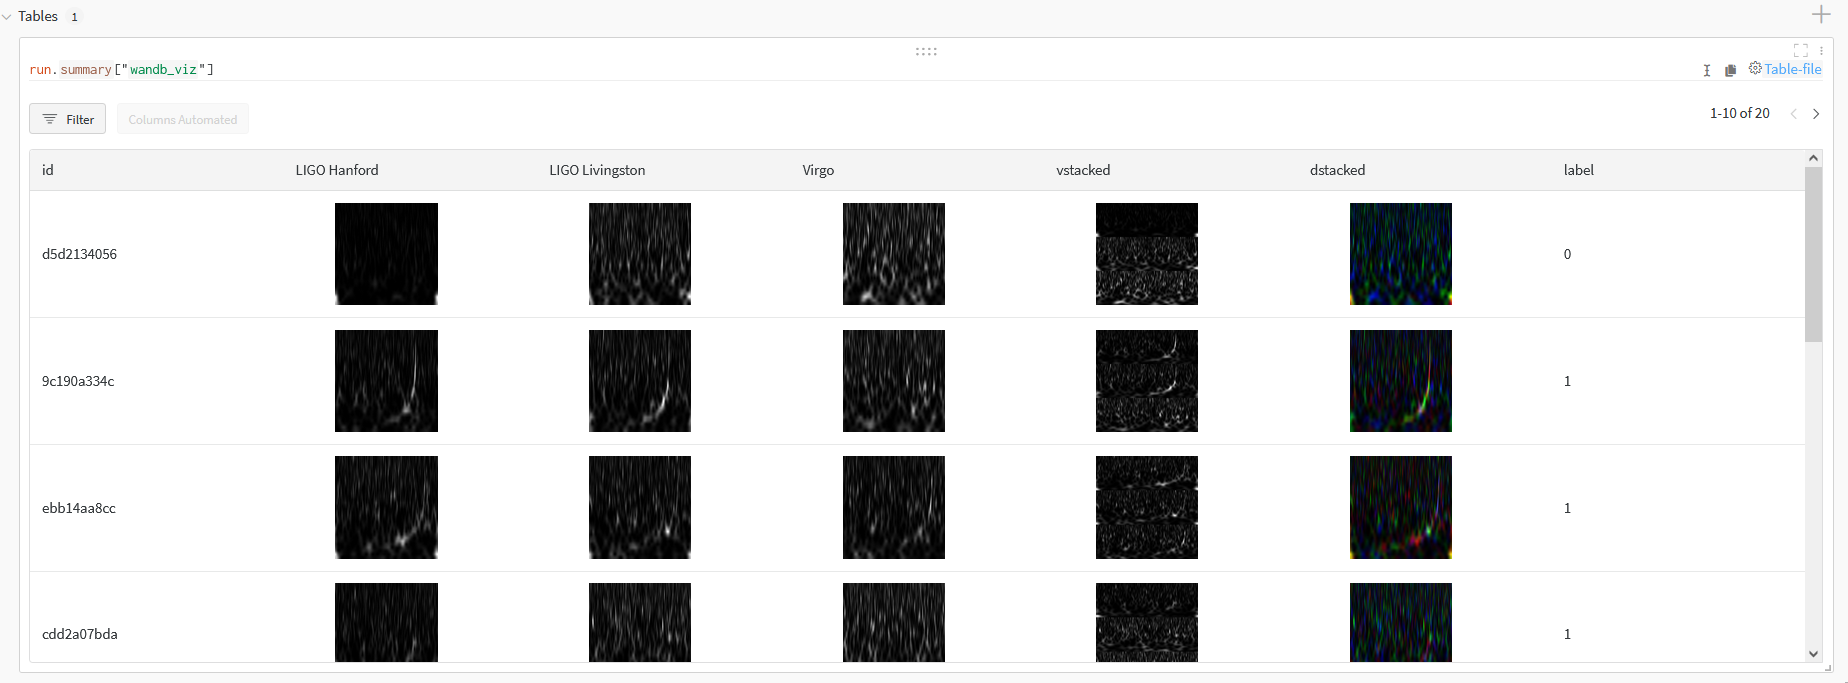

## Two cents on W&B Tables

> WB Tables accelerate the ML development lifecycle by giving users the ability to rapidly extract meaningful insights from data. The WB Table Visualizer provides an interactive interface to perform powerful analytics functions like grouping, joining, and creating custom fields while simultaneously supporting rich media annotations such as bounding boxes and segmentation masks. WB Tables is designed generically to work well for a wide range of use cases - from analyzing intermediate data transformations to reviewing model predictions - while being directly integrated directly into the WB UI dashboard, allowing users to learn, adapt, and improve their models effectively and efficiently.

# Work In Progress